In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn import datasets

import cv2
import skimage.color as ski

In [3]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

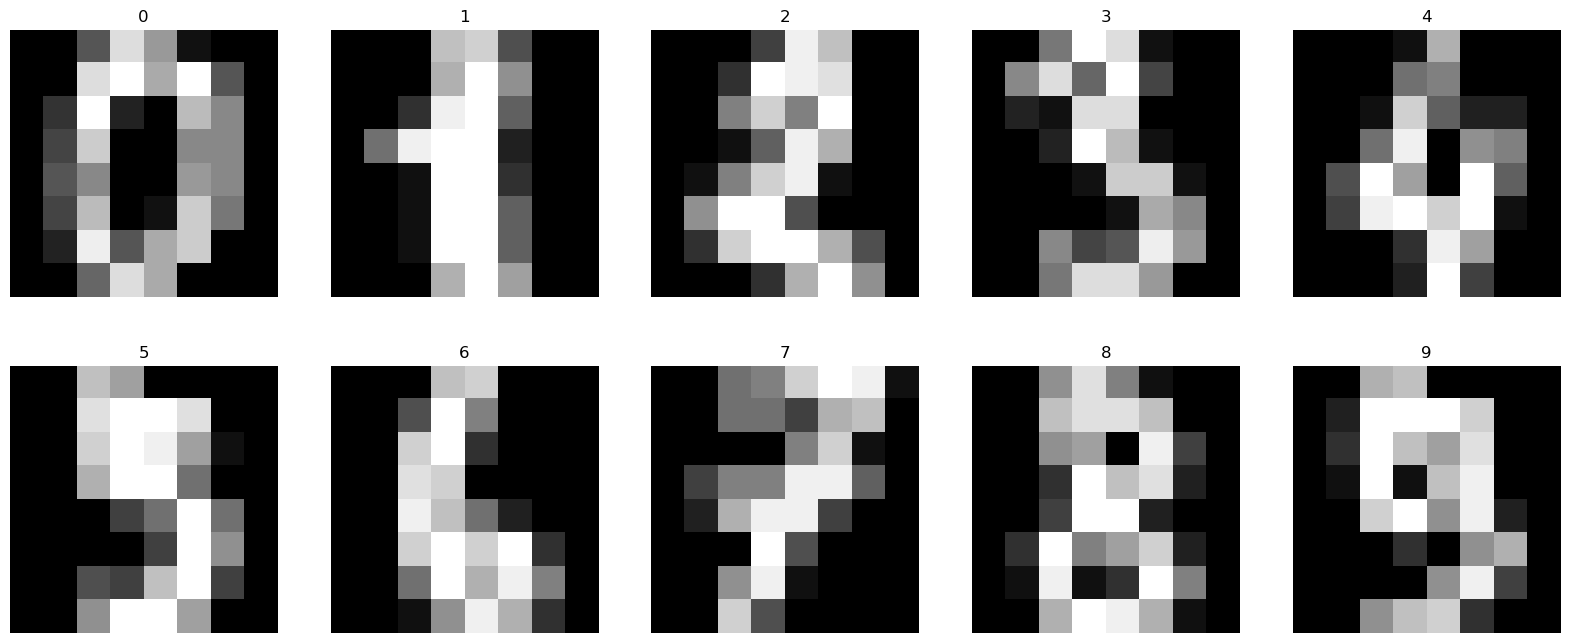

In [4]:
plt.subplots(2,5,figsize=(20,8))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X[i].reshape(8,8),cmap='gray')
    plt.title(f'{y[i]}')
    plt.axis('off')
plt.show()

In [5]:
# Using the train-test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42)

In [6]:
#standard scaler
sc = StandardScaler()

#fitting on the training data
sxtrain = sc.fit_transform(X_train)

#transforming the test data as well
sxtest = sc.transform(X_test)

# Linear Discriminant Analysis

In [7]:
lda = LinearDiscriminantAnalysis(n_components=9)
# 64 features, 10 classes
# therefore, (C-1) or (10-1) components, i.e 9 components

In [8]:
#fitting and transforming the X_train
xtrain = lda.fit_transform(sxtrain,y_train)
xtest = lda.transform(sxtest)

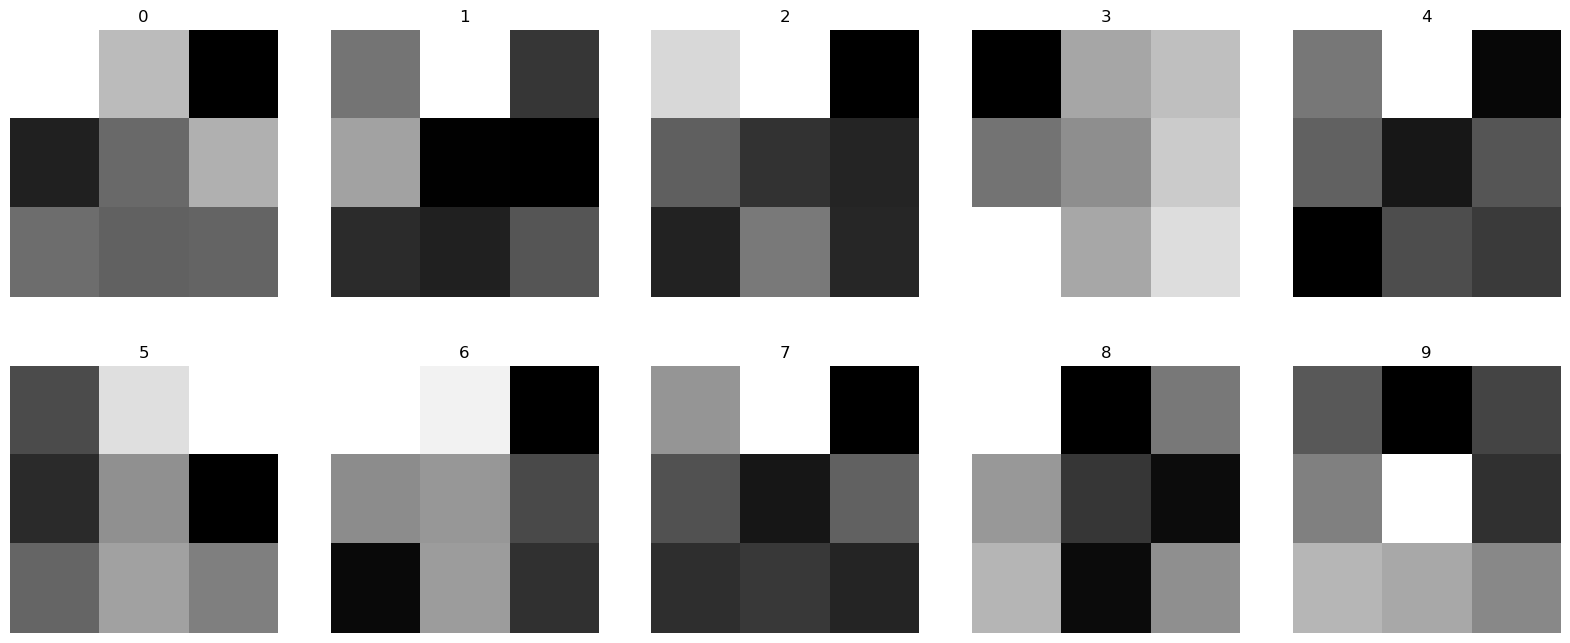

In [9]:
#replotting the new data
plt.subplots(2,5,figsize=(20,8))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(xtrain[i].reshape(3,3),cmap='gray')
    plt.title(f'{y[i]}')
    plt.axis('off')
plt.show()

# training a model on the LDA'd data

In [10]:
# using a RFC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve

rfc = RandomForestClassifier(n_estimators=100,random_state=42)

In [11]:
# training the random forest classifier
rfc.fit(xtrain,y_train)

RandomForestClassifier(random_state=42)

In [12]:
# predicing the test data
y_pred = rfc.predict(xtest)

print(f'The accuracy score of the classifier is {accuracy_score(y_test,y_pred)}')

The accuracy score of the classifier is 0.9527777777777777


              precision    recall  f1-score   support

           0       1.00      0.94      0.97        33
           1       0.93      0.93      0.93        28
           2       0.91      0.97      0.94        33
           3       0.92      0.97      0.94        34
           4       0.94      0.98      0.96        46
           5       0.98      0.96      0.97        47
           6       1.00      0.97      0.99        35
           7       0.97      0.97      0.97        34
           8       0.96      0.90      0.93        30
           9       0.93      0.93      0.93        40

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



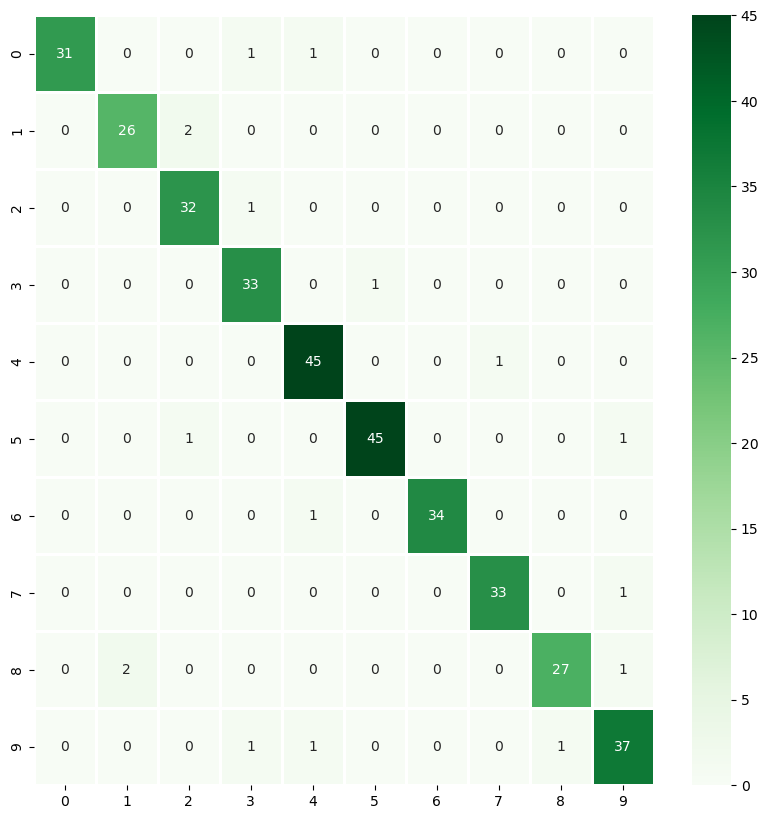

In [13]:
# confusion matrix/classification report

print(classification_report(y_test,y_pred),end='\n')

plt.subplots(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test,y_pred,labels=np.arange(0,10)),annot=True,linewidth=2,cmap='Greens')
plt.show()

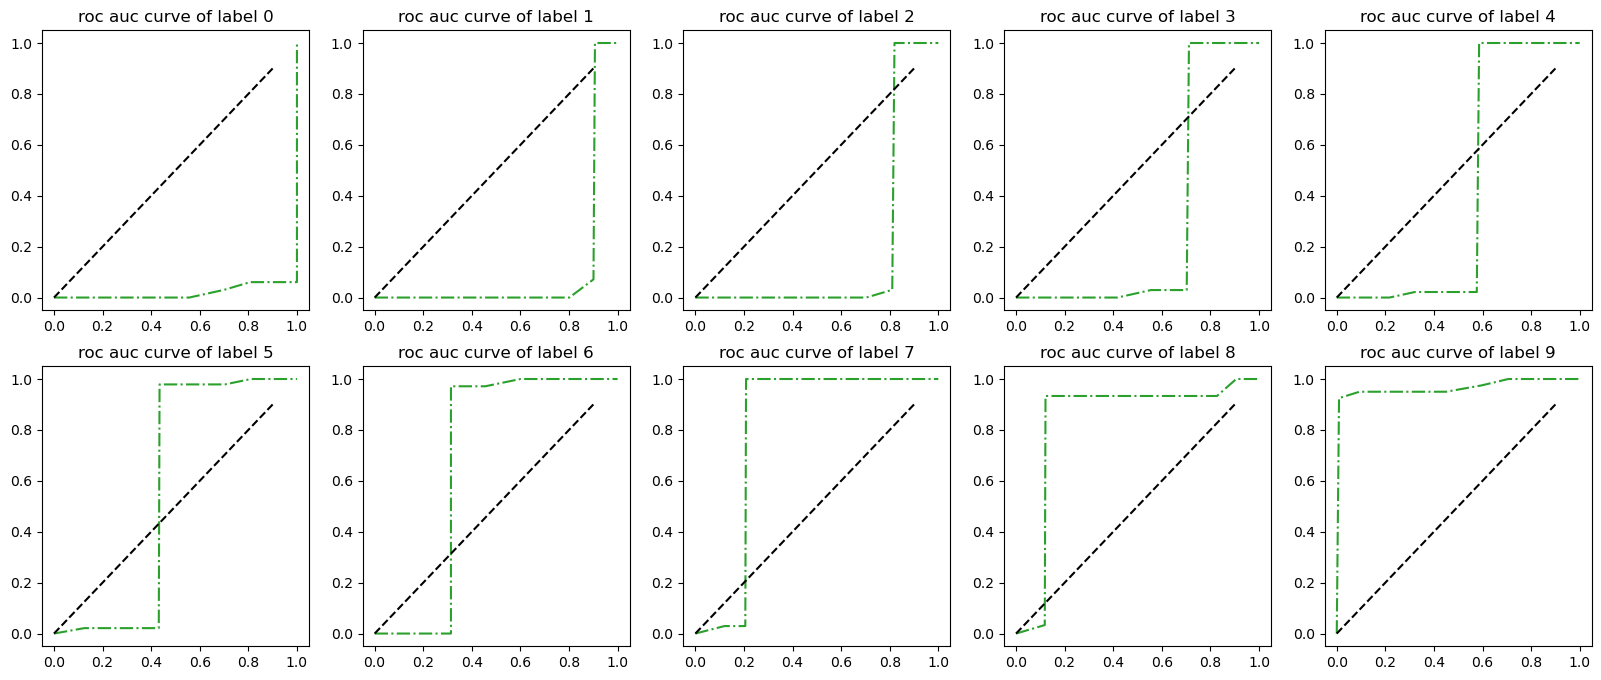

In [14]:
# roc-curve
#replotting the new data
plt.subplots(2,5,figsize=(20,8))
for i in range(10):
    plt.subplot(2,5,i+1)
    fpr,tpr,thresh = roc_curve(y_test,y_pred,pos_label=i)
    plt.plot(fpr,tpr,ls='-.',c='C2')
    plt.plot(np.arange(0,1,.1),np.arange(0,1,.1),ls='--',c='k')
    plt.title(f'roc auc curve of label {i}')
plt.show()

## The Extras

In [16]:
# importing an image
a = cv2.imread('dog.jpeg')
gray = ski.rgb2gray(a)

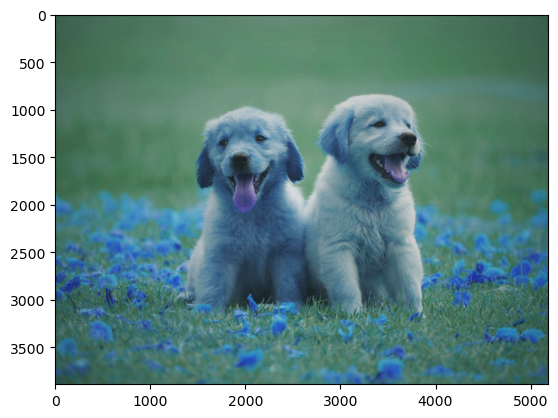

In [23]:
plt.imshow(a)

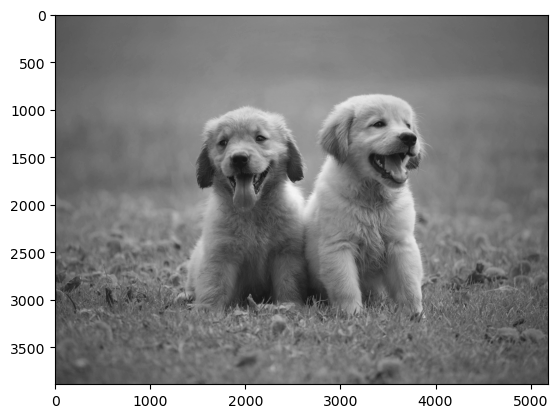

In [18]:
plt.imshow(gray,cmap='gray')

In [19]:
#resizing
a1 = cv2.resize(a,(50,50))

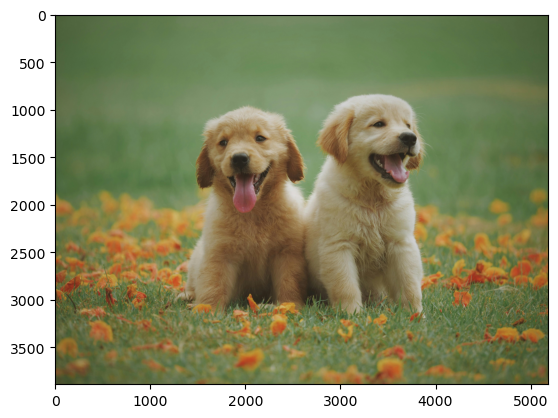

In [24]:
plt.imshow(a[:,:,::-1]) #notice the red hues, and how the blue hues go into the background